In [114]:
#importing necessary details
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read titanic_train dataset
data=pd.read_csv('titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


.there are  missing value  in Age

In [5]:
#To check the full details of both catrgorical and continous features
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

.There are null value in Age , Cabin ,and Embarked.

In [47]:
#fill the null values
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0][0])
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [45]:
#verify that null values are filled or not
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

.Now there is no missing values

We have categorical values feature i.e Name,Sex,Ticket,Cabin,embarked.                      
We dont have any importance of having PassengerId .so we are going to remove them.

In [11]:
#to drop PassengerId and Name
data=data.drop(['PassengerId','Name'],axis=1)

In [48]:
#to check the data again
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [25]:
#to encode the categorical value of features
#To convert Embarked ,we use LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [26]:
lab_enc=LabelEncoder()

In [28]:
df=lab_enc.fit_transform(data['Embarked'])
pd.Series(df)

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Length: 891, dtype: int32

In [29]:
data['Embarked']=df

In [30]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,B96 B98,2
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,0
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,2
3,1,1,female,35.000000,1,0,113803,53.1000,C123,2
4,0,3,male,35.000000,0,0,373450,8.0500,B96 B98,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,B96 B98,2
887,1,1,female,19.000000,0,0,112053,30.0000,B42,2
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,2
889,1,1,male,26.000000,0,0,111369,30.0000,C148,0


In [41]:
#To conver sex features using Label encoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df1=lab_enc.fit_transform(data['Sex'])
pd.Series(df1)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Length: 891, dtype: int32

In [42]:
data['Sex']=df1

In [49]:
#To check tha dataset
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,A/5 21171,7.2500,B96 B98,2
1,1,1,0,38.000000,1,0,PC 17599,71.2833,C85,0
2,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,2
3,1,1,0,35.000000,1,0,113803,53.1000,C123,2
4,0,3,1,35.000000,0,0,373450,8.0500,B96 B98,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,211536,13.0000,B96 B98,2
887,1,1,0,19.000000,0,0,112053,30.0000,B42,2
888,0,3,0,29.699118,1,2,W./C. 6607,23.4500,B96 B98,2
889,1,1,1,26.000000,0,0,111369,30.0000,C148,0


.Now the categorical column are encoded nd some features like ticket  is not important so we can drop them

In [50]:
#To drop the features Ticket
data=data.drop(['Ticket'],axis=1)

In [51]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,B96 B98,2
1,1,1,0,38.000000,1,0,71.2833,C85,0
2,1,3,0,26.000000,0,0,7.9250,B96 B98,2
3,1,1,0,35.000000,1,0,53.1000,C123,2
4,0,3,1,35.000000,0,0,8.0500,B96 B98,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,B96 B98,2
887,1,1,0,19.000000,0,0,30.0000,B42,2
888,0,3,0,29.699118,1,2,23.4500,B96 B98,2
889,1,1,1,26.000000,0,0,30.0000,C148,0


In [52]:
#to check the unique values of cabin
data['Cabin'].unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [54]:
#To Convert Dataset to str
char_cabin=data['Cabin'].astype(str)
new_cabin=np.array([Cabin[0] for Cabin in char_cabin])
new_cabin=pd.Categorical(new_cabin)
new_cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,734,0.823793
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122


In [55]:
#To replace the value of new_cabnin with the Cabin
data['Cabin']=new_cabin

In [56]:
#To check the dataset
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,B,2
1,1,1,0,38.000000,1,0,71.2833,C,0
2,1,3,0,26.000000,0,0,7.9250,B,2
3,1,1,0,35.000000,1,0,53.1000,C,2
4,0,3,1,35.000000,0,0,8.0500,B,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,B,2
887,1,1,0,19.000000,0,0,30.0000,B,2
888,0,3,0,29.699118,1,2,23.4500,B,2
889,1,1,1,26.000000,0,0,30.0000,C,0


In [67]:
#Now we can encode the Cabin value using LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [68]:
lab_enc=LabelEncoder()

In [69]:
df2=lab_enc.fit_transform(data['Cabin'])
pd.Series(df2)

0      1
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    1
889    2
890    1
Length: 891, dtype: int32

In [70]:
#override value of Cabin with codes
data['Cabin']=df2

In [71]:
#checking Dataset
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,1,2
1,1,1,0,38.000000,1,0,71.2833,2,0
2,1,3,0,26.000000,0,0,7.9250,1,2
3,1,1,0,35.000000,1,0,53.1000,2,2
4,0,3,1,35.000000,0,0,8.0500,1,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,1,2
887,1,1,0,19.000000,0,0,30.0000,1,2
888,0,3,0,29.699118,1,2,23.4500,1,2
889,1,1,1,26.000000,0,0,30.0000,2,0


Now all the categorical features are converted into numeric data ,Now we can use algorithm


In [74]:
#to check the summary of dataset
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.318743,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.916440,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,1.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,7.000000,2.000000


.There is a problem in mean and std in the features like Age,fare. 


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

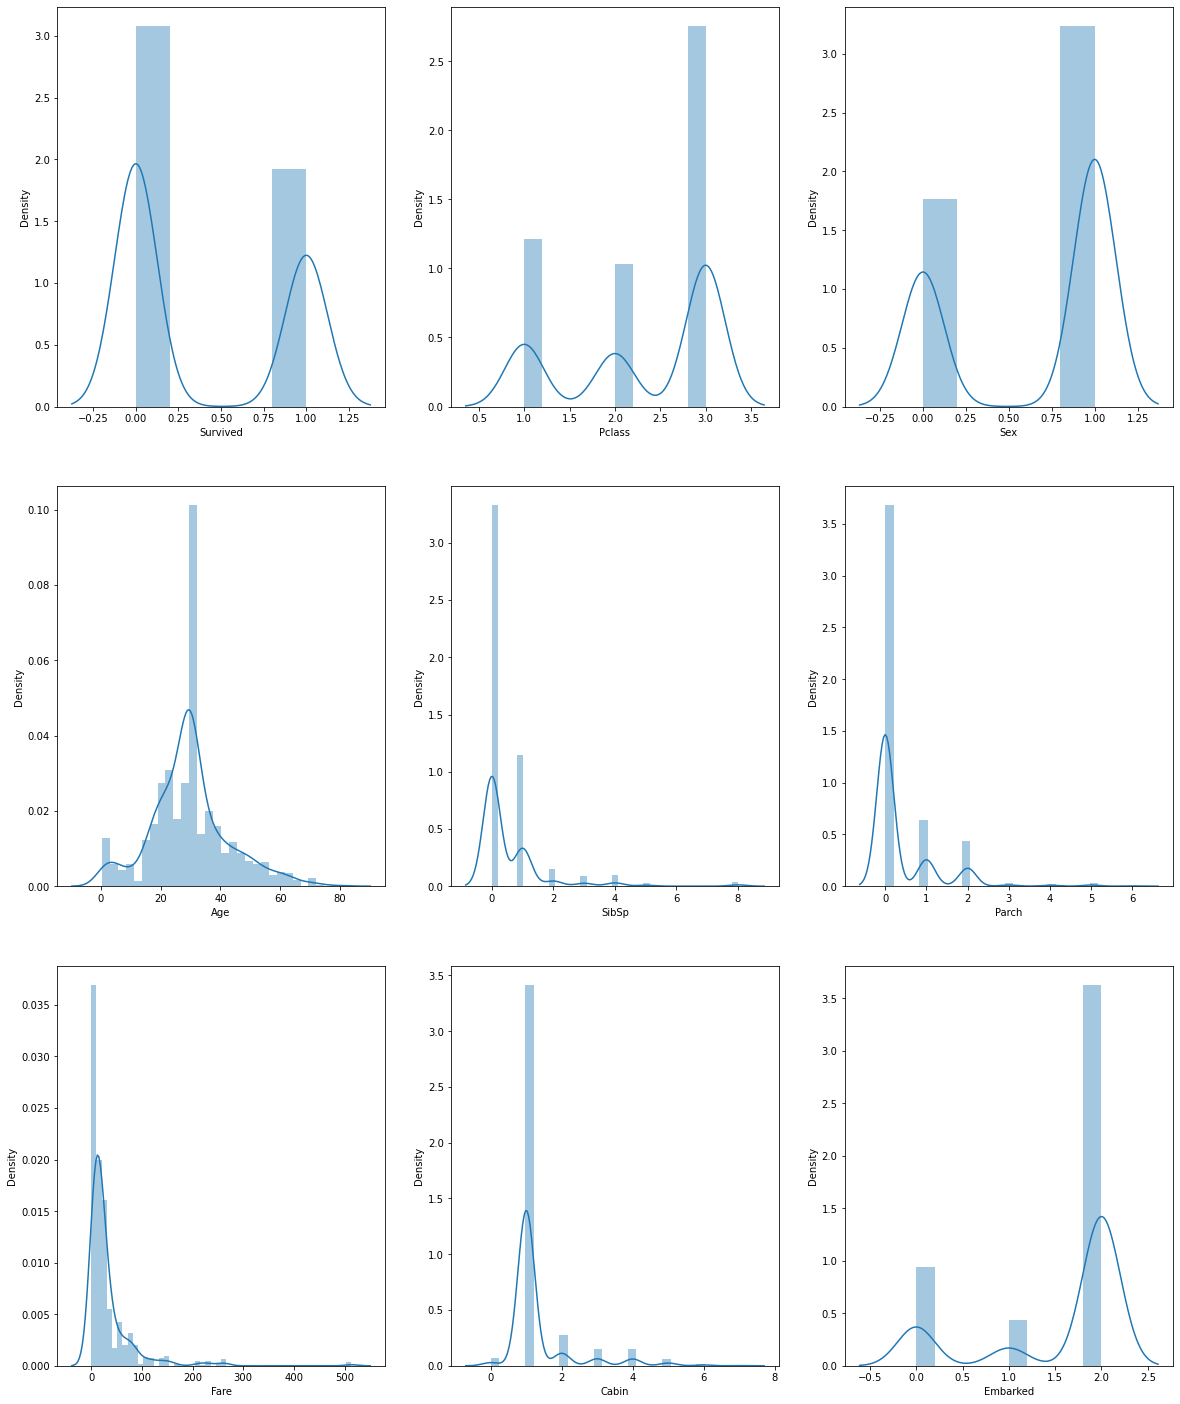

In [78]:
#lets see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

We can see there is some skewness in the column i.e Age,Fare,Cabin,SibSp,Parch.

In [85]:
#To remove skewness in Age
q=data['Age'].quantile(0.94)
data_cleaned=data[data['Age']<q]

#Removing outliers from SibSp
data['SibSp'].quantile(0.91)
data_cleaned=data[data['SibSp']<q]

#removing outliers from Fare
data['Fare'].quantile(0.88)
data_cleaned=data[data['Fare']<q]

#removing outliers from Parch
data['Parch'].quantile(0.89)
data_cleaned=data[data['Parch']<q]

#removing outlierts from Cabin
data['Cabin'].quantile(0.93)
data_cleaned=data[data['Cabin']<q]

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

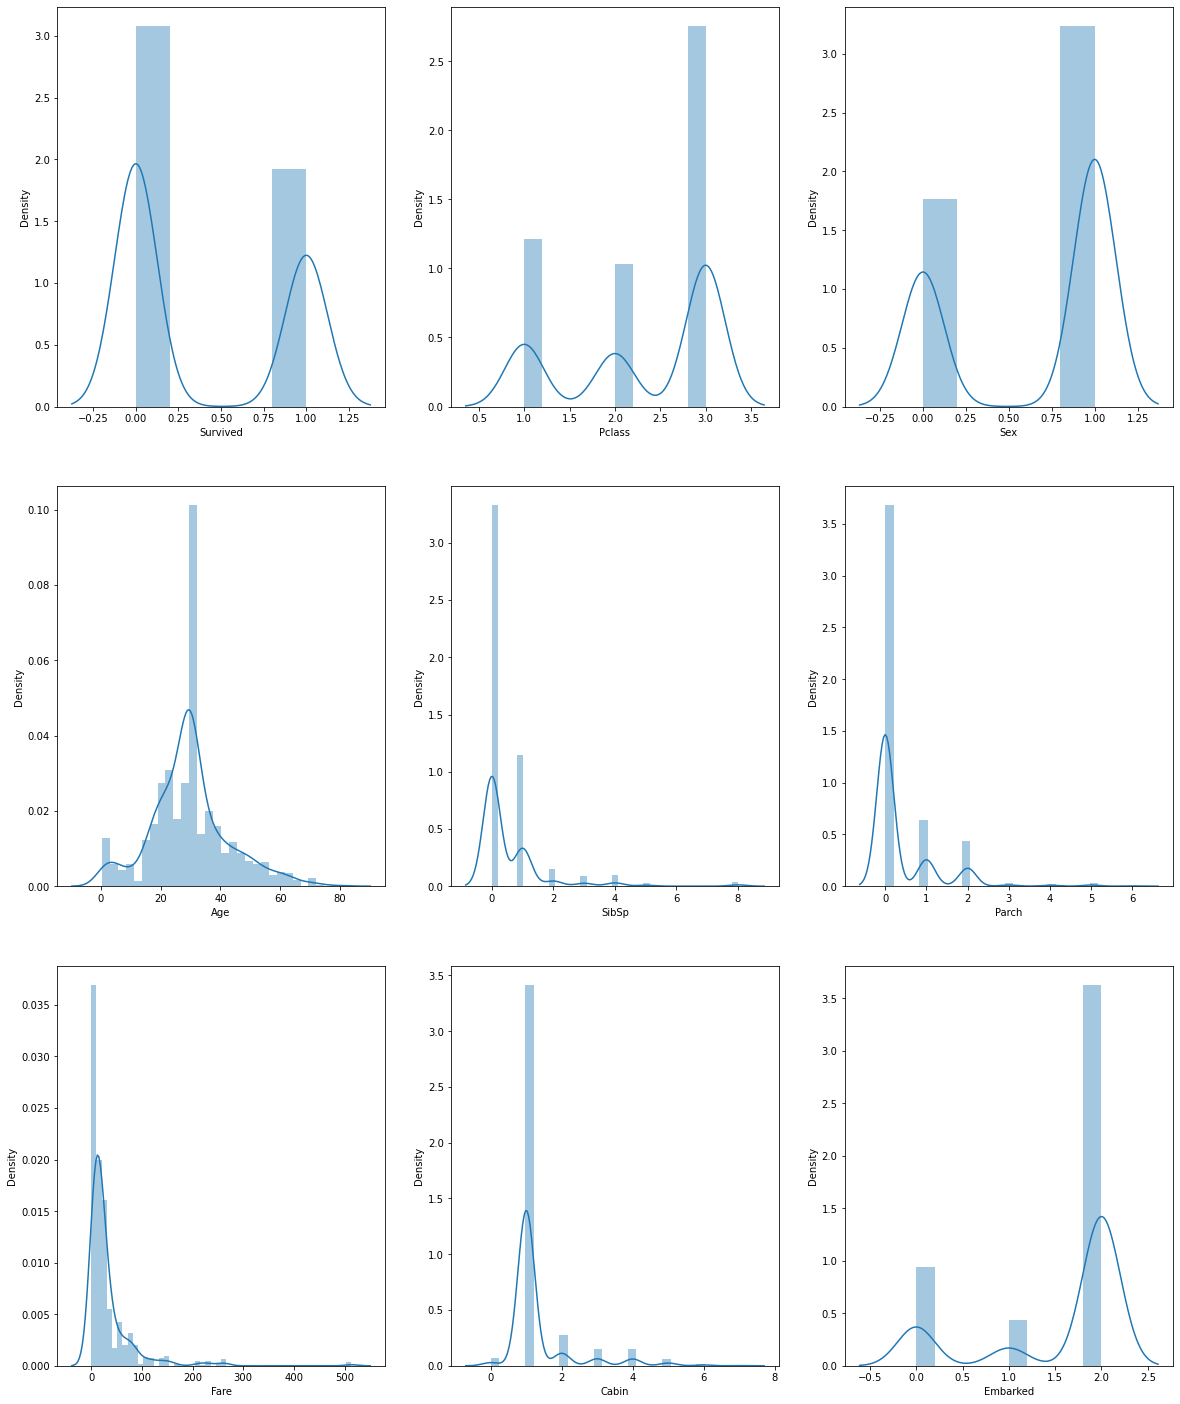

In [86]:
#Now check again the data distribution of dataset
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data_cleaned:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int32  
 8   Embarked  891 non-null    int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 52.3 KB


In [88]:
#split the dataset in two table know as features(x) and label(y)
x=data.drop(columns=['Survived'])
y=data['Survived']

In [90]:
#To check imbalancing label
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

.Dataset is balanced .so, we can proceed further

In [92]:
#standarization
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [94]:
#To checking multicolinearity using vif
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,1.823133,Pclass
1,1.116479,Sex
2,1.206317,Age
3,1.282421,SibSp
4,1.323453,Parch
5,1.652898,Fare
6,1.135590,Cabin
7,1.083473,Embarked


.All the features have less then 5 vif value.That means, Their is no multicollinearity.Now we can go ahead with fitting our data to the model. 

In [96]:
#DOING train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=301)

In [98]:
#fitting the model
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [99]:
#prediction
y_pred=log_reg.predict(x_test)

In [100]:
#checking accuracy
accuracy=accuracy_score(y_test,y_pred)

In [101]:
accuracy

0.7713004484304933

In [102]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[120,  17],
       [ 34,  52]], dtype=int64)

now checking the accuracy with knn model

In [103]:
#Using SelectKBest feature Selection Method
from sklearn.feature_selection import SelectKBest,f_classif

In [107]:
 best_features=SelectKBest(score_func=f_classif,k=6)
 fit=best_features.fit(x,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(x.columns)

#Concatnate dataframes
feature_scores=pd.concat([data_columns,data_scores],axis=1)
feature_scores.columns=['Feature_Name','score']
print(feature_scores.nlargest(6,'score'))

  Feature_Name       score
1          Sex  372.405724
0       Pclass  115.031272
5         Fare   63.030764
6        Cabin   40.649101
7     Embarked   25.717286
4        Parch    5.963464


In [108]:
new_x=data[['Sex','Pclass','Fare','Cabin','Embarked','Parch']]
new_x

,Sex,Pclass,Fare,Cabin,Embarked,Parch
0,1,3,7.2500,1,2,0
1,0,1,71.2833,2,0,0
2,0,3,7.9250,1,2,0
3,0,1,53.1000,2,2,0
4,1,3,8.0500,1,2,0
...,...,...,...,...,...,...
886,1,2,13.0000,1,2,0
887,0,1,30.0000,1,2,0
888,0,3,23.4500,1,2,2
889,1,1,30.0000,2,0,0


In [109]:
#standarization
scaler=StandardScaler()
x_scaler=scaler.fit_transform(new_x)

In [111]:
#Buiolding model
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=304)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [112]:
#confusion matrix
cfm=confusion_matrix(y_test,y_pred)

In [113]:
cfm

array([[126,  13],
       [ 32,  52]], dtype=int64)

In [115]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       139
           1       0.80      0.62      0.70        84

    accuracy                           0.80       223
   macro avg       0.80      0.76      0.77       223
weighted avg       0.80      0.80      0.79       223



.With the help of Logistic Regression ,we got a accuracy of 77% whereas with the help knn model ,we got accuracy of 80%. nd we also got less FP and FN value in knn model as compare to LogisticRegression.

In [118]:
#To check wheather the model is overfitting or not using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(knn,x_scaler,y,cv=5)


array([0.70391061, 0.76404494, 0.8258427 , 0.78651685, 0.83707865])

In [119]:
cross_val_score(KNeighborsClassifier(),x_scaler,y,cv=5).mean()

0.7834787521185111

In [120]:
#hyperParameter Tunning using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [121]:
param_grid={'algorithm':['kd_tree','brute'],
           'leaf_size':[10,12,14],
           'n_neighbors':[3,5,7,9]
           }

In [122]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)

In [123]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [10, 12, 14],
                         'n_neighbors': [3, 5, 7, 9]})

In [124]:
#finding best parameters
gridsearch.best_params_

{'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 3}

In [125]:
#we will use the best parameter in our knn algorithms and check if accuracy is increasing
knn=KNeighborsClassifier(algorithm='brute',leaf_size=10,n_neighbors=3)

In [126]:
#model fitting
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=10, n_neighbors=3)

In [127]:
#prediction
y_pred=knn.predict(x_test)

In [128]:
#confusion_matrix
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[121,  18],
       [ 32,  52]], dtype=int64)

In [129]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       139
           1       0.74      0.62      0.68        84

    accuracy                           0.78       223
   macro avg       0.77      0.74      0.75       223
weighted avg       0.77      0.78      0.77       223



.we got highest accuract of 80% in knn model.

In [ ]:
#saving model
import pickle
with open('modelForPrediction.sav','wb')as f:
    pickle.dump(log_reg,f)
    
with open('standardScaler.sav','wb')as f:
    pickle.dump(scaler,f)